In [ ]:
## Introduction

CovsirPhy is a Python library for COVID-19 (Coronavirus infection 2019) 

information investigation with stage subordinate SIR-determined ODE models. We can download 

datasets and investigate them without any problem. Situation investigation with CovsirPhy empowers 

us to settle on information educated choices. Kindly allude to "https://pypi.org/project/covsirphy/" for more data.


In [1]:
import os
os.chdir("../")

In [2]:
from pprint import pprint
import covsirphy as cs

In [28]:
data_loader = cs.DataLoader("input")
jhu_data = data_loader.jhu(verbose=False)
population_data = data_loader.population(verbose=False)
oxcgrt_data = data_loader.oxcgrt(verbose=False)


In [4]:
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
len(analyser.countries)

196

In [5]:
type(analyser.scenario("Canada"))

covsirphy.analysis.scenario.Scenario

In [6]:
analyser.trend(18)

In [7]:
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
Completed optimization. Total: 5 min 49 sec


In [8]:
analyser.scenario("Canada")

In [9]:
Quebec = cs.Scenario(jhu_data, population_data, country="Canada", province="Quebec")
Alberta = cs.Scenario(jhu_data, population_data, country="Canada", province="Alberta")
Ontario = cs.Scenario(jhu_data, population_data, country="Canada", province="Ontario")
BC = cs.Scenario(jhu_data, population_data, country="Canada", province="British Columbia")


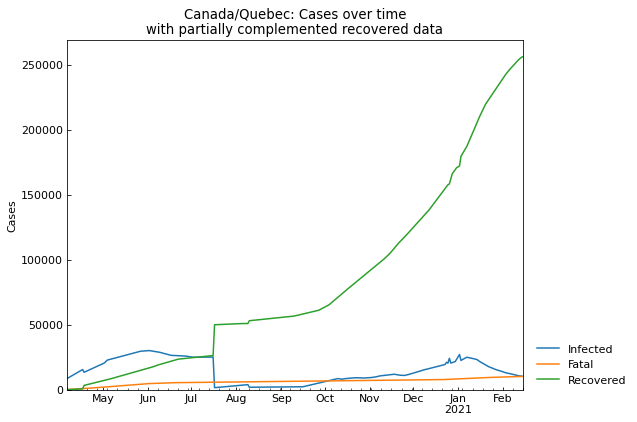

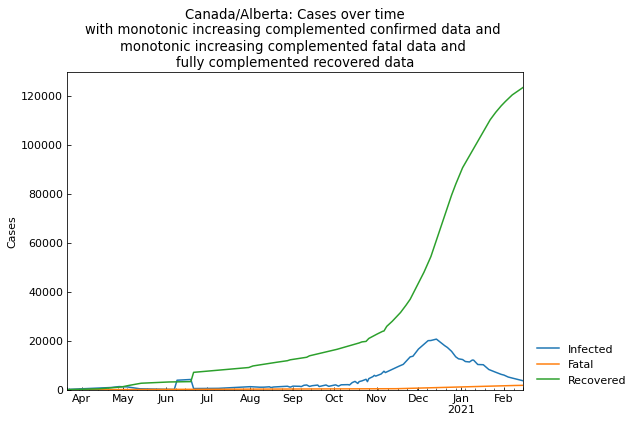

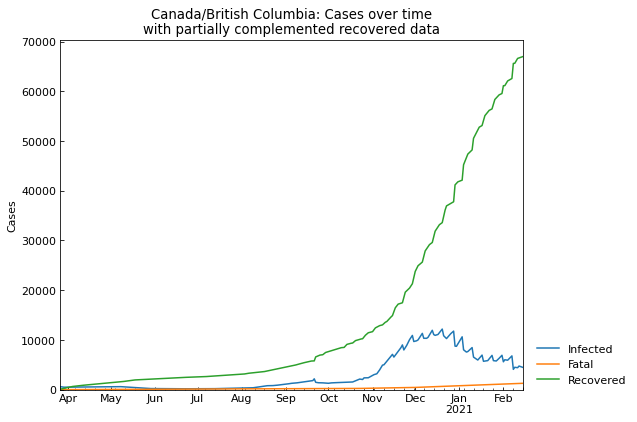

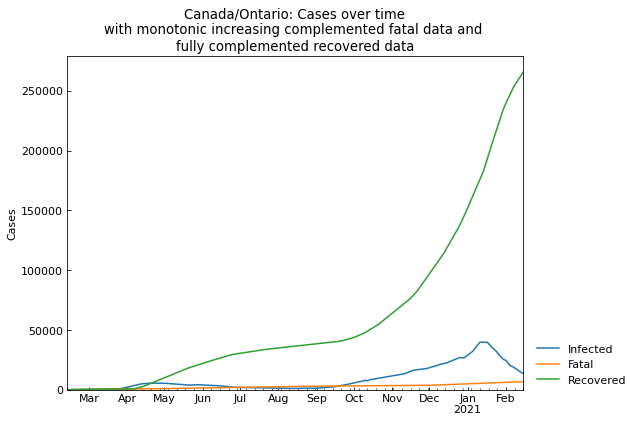

Date  Confirmed  Infected  Fatal  Recovered Province  Population
0    2020-03-21        108       106      0          2  Alberta     4413146
1    2020-03-22        124       121      0          3  Alberta     4413146
2    2020-03-23        145       139      0          6  Alberta     4413146
3    2020-03-24        172       163      0          9  Alberta     4413146
4    2020-03-25        202       191      0         11  Alberta     4413146
...         ...        ...       ...    ...        ...      ...         ...
1340 2021-02-11     282511     15679   6614     260218  Ontario    14711827
1341 2021-02-12     283587     14932   6632     262023  Ontario    14711827
1342 2021-02-13     284887     14280   6651     263956  Ontario    14711827
1343 2021-02-14     285868     14488   6693     264687  Ontario    14711827
1344 2021-02-15     285868     13383   6693     265792  Ontario    14711827

[1345 rows x 7 columns]

In [10]:
import pandas as pd
Quebec.summary()
df2 = Quebec.records()
df2['Province'] = 'Quebec'
df2['Population']= 8537674

Alberta.summary()
df1 = Alberta.records()
df1['Province'] = 'Alberta'
df1['Population'] = 4413146
df11 = pd.merge(df1, df2, how='outer')

BC.summary()
df3 = BC.records()
df3['Province'] = 'BC'
df3['Population']= 8537674

Ontario.summary()
df4 = Ontario.records()
df4['Province'] = 'Ontario'
df4['Population'] = 14711827
df22 = pd.merge(df3, df4, how='outer')

df = pd.merge(df11, df22, how='outer')
df

In [11]:
import plotly.express as px
fig = px.line(df, x="Date", y="Recovered", color="Province", line_group="Province", hover_name="Province",
        line_shape="spline", render_mode="svg",
        color_discrete_sequence=px.colors.qualitative.Set1,template="simple_white")
fig.show()

In [12]:
fig = px.line(df, x="Date", y="Infected", color="Province", line_group="Province", hover_name="Province",
        line_shape="spline", render_mode="svg",
        color_discrete_sequence=px.colors.qualitative.Set1,template="simple_white")
fig.show()

In [13]:
import plotly.express as px

fig = px.line(df, x="Date", y="Fatal", color="Province", line_group="Province",
              line_shape="spline", render_mode="svg",template="simple_white",
             color_discrete_sequence=px.colors.qualitative.Set1,
             title="Fatal Cases")

fig.show()



In [14]:
import pandas as pd
df1 = Alberta.summary()
df2 = Ontario.summary()
df3 = Quebec.summary()
df4 = BC.summary()

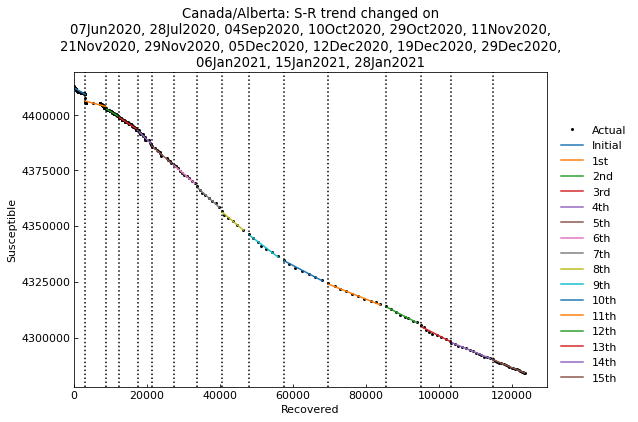


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	 0th phase (28Jan2021 - 15Feb2021): finished  741 trials in 3 min 10 sec
Completed optimization. Total: 12 min  9 sec


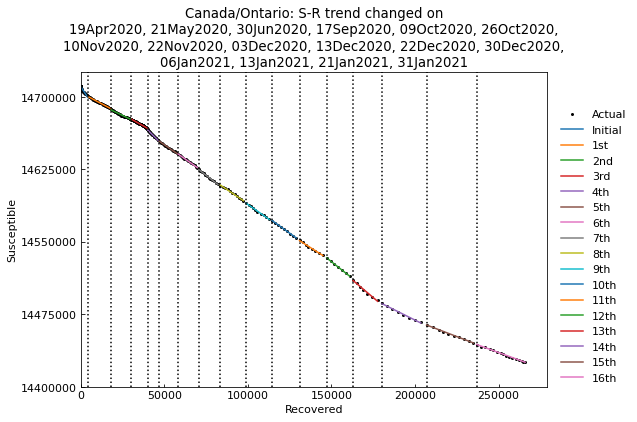


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	 0th phase (06Jan2021 - 12Jan2021): finished  332 trials in 1 min 11 sec
Completed optimization. Total: 8 min 12 sec


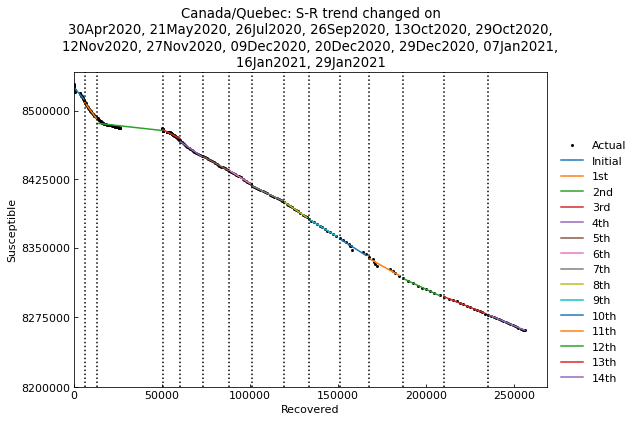


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	 0th phase (20Dec2020 - 28Dec2020): finished  762 trials in 3 min  3 sec
Completed optimization. Total: 9 min 45 sec


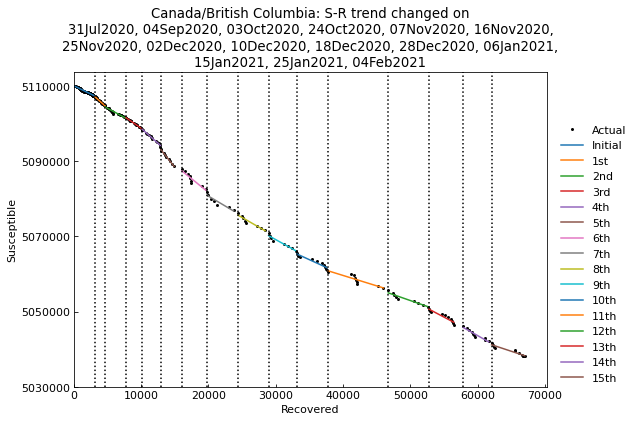


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	 0th phase (04Feb2021 - 15Feb2021): finished  681 trials in 3 min  2 sec
Completed optimization. Total: 15 min 31 sec


In [15]:
Alberta.trend()
Alberta.estimate(cs.SIRF)
Ontario.trend()
Ontario.estimate(cs.SIRF)
Quebec.trend()
Quebec.estimate(cs.SIRF)
BC.trend()
BC.estimate(cs.SIRF)

In [16]:
import numpy as np
#Alberta.trend(set_phases=True)
df01 = Alberta.summary()
df01['Province'] = 'Alberta'
df01['phase'] = np.arange(df01.shape[0])

#Quebec.trend(set_phases=True)
df02 = Quebec.summary()
df02['Province'] = 'Quebec'
df02['phase'] = np.arange(df02.shape[0])

df011 = pd.merge(df01, df02, how='outer')

#BC.trend(set_phases=True)
df03 = BC.summary()
df03['Province'] = 'BC'
df03['phase'] = np.arange(df03.shape[0])

#Ontario.trend(set_phases=True)
df04 = Ontario.summary()
df04['Province'] = 'Ontario'
df04['phase'] = np.arange(df04.shape[0])

df022 = pd.merge(df03, df04, how='outer')

df001 = pd.merge(df011, df022, how='outer')
df001

Type      Start        End  Population    ODE    Rt     theta     kappa  \
0   Past  21Mar2020  06Jun2020     4413146  SIR-F  1.36  0.065309  0.000182   
1   Past  07Jun2020  27Jul2020     4413146  SIR-F  2.43  0.000549  0.000250   
2   Past  28Jul2020  03Sep2020     4413146  SIR-F  0.95  0.018359  0.000002   
3   Past  04Sep2020  09Oct2020     4413146  SIR-F  1.02  0.000121  0.000294   
4   Past  10Oct2020  28Oct2020     4413146  SIR-F  2.43  0.000443  0.000236   
..   ...        ...        ...         ...    ...   ...       ...       ...   
59  Past  30Dec2020  05Jan2021    14711827  SIR-F  1.33  0.000349  0.000708   
60  Past  06Jan2021  12Jan2021    14711827  SIR-F  1.55  0.002518  0.000618   
61  Past  13Jan2021  20Jan2021    14711827  SIR-F  0.84  0.001455  0.000747   
62  Past  21Jan2021  30Jan2021    14711827  SIR-F  0.64  0.001455  0.000747   
63  Past  31Jan2021  15Feb2021    14711827  SIR-F  0.61  0.003454  0.000997   

         rho     sigma  tau  alpha1 [-]  1/alpha2 [day]  1/gamma [day]  \
0   0.056558  0.038626  720       0.065            2749             12   
1   0.052263  0.021281  720       0.001            1997             23   
2   0.036364  0.037571  720       0.018          205639             13   
3   0.040147  0.039112  720       0.000            1698             12   
4   0.037709  0.015278  720       0.000            2116             32   
..       ...       ...  ...         ...             ...            ...   
59  0.051687  0.038137  720       0.000             706             13   
60  0.045457  0.028619  720       0.003             808             17   
61  0.037491  0.043813  720       0.001             669             11   
62  0.034591  0.053467  720       0.001             669              9   
63  0.034331  0.054756  720       0.003             501              9   

    1/beta [day]     RMSLE  Trials       Runtime Province  phase  
0              8  0.796425     964  3 min  2 sec  Alberta      0  
1              9  0.993130    1251  3 min  2 sec  Alberta      1  
2             13  0.093745    1283  3 min  1 sec  Alberta      2  
3             12  0.091045     995  3 min  3 sec  Alberta      3  
4             13  0.074274    1298  3 min  1 sec  Alberta      4  
..           ...       ...     ...           ...      ...    ...  
59             9  0.006553     234  0 min 40 sec  Ontario     12  
60            10  0.015928     332  1 min 11 sec  Ontario     13  
61            13  0.019194     122  0 min 20 sec  Ontario     14  
62            14  0.018583     145  0 min 20 sec  Ontario     15  
63            14  0.018068     193  0 min 20 sec  Ontario     16  

[64 rows x 20 columns]

In [17]:
print("phase 0 Start 21Mar2020  End 06Jun2020")

phase 0 Start 21Mar2020  End 06Jun2020


## 𝜎 : Recovery rate [−]

In [18]:
import plotly.express as px

fig = px.line(df001, x="phase", y="sigma", color="Province", line_group="Province",
              line_shape="spline",#text ='End',
              render_mode="svg",
              template="simple_white",
             color_discrete_sequence=px.colors.qualitative.Set1,
             title="Phase 0:Mar to Jun| Phase 5:Oct to Nov| Phase 10:Dec to Jan| Phase 15:Jan to Feb")
fig.update_layout(
    font_family="Times New Roman",font_color="blue",
    title_font_family="Times New Roman",font=dict(
        family="Courier New, monospace",
        size=12
    )
)
fig.show()

In [19]:
#present only those rows where kappa < > 0.1
df_1 = df001[df001.Rt < 6]

## 𝑅𝑡 : Reprodcution number [−]

In [20]:
import plotly.express as px

fig = px.line(df_1, x="phase", y="Rt", color="Province", line_group="Province",template="simple_white",
              line_shape="spline", render_mode="svg",
             color_discrete_sequence=px.colors.qualitative.Set1,
            title="Phase 0-5:Mar to Jun| Phase 5-10:Jul to Oct| Phase 10-15:Nov to Jan| Phase 15 and up:Jan to Feb")
fig.update_layout(
    font_family="Times New Roman",font_color="blue",
    title_font_family="Times New Roman",font=dict(
        family="Courier New, monospace",
        size=12
    )
)
fig.show()

## 𝜌 : Effective contact rate [−]

In [21]:
import plotly.express as px

fig = px.line(df001, x="phase", y="rho", color="Province", line_group="Province",
              line_shape="spline", render_mode="svg",template="simple_white",
             color_discrete_sequence=px.colors.qualitative.Set1,
            title="Phase 0-5:Mar to Jun| Phase 5-10:Jul to Oct| Phase 10-15:Nov to Jan| Phase 15 and up:Jan to Feb")
fig.update_layout(
    font_family="Times New Roman",font_color="blue",
    title_font_family="Times New Roman",font=dict(
        family="Courier New, monospace",
        size=12,
    )
)
fig.show()

In [22]:
#present only those rows where kappa < > 0.1
df_1_1 = df001[df001.theta < 0.4]

## $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

In [23]:
import plotly.express as px

fig = px.line(df_1_1, x="phase", y="theta", color="Province", line_group="Province",
              line_shape="spline", render_mode="svg",template="simple_white",
             color_discrete_sequence=px.colors.qualitative.Set1,
            title="Phase 0-5:Mar to Jun| Phase 5-10:Jul to Oct| Phase 10-15:Nov to Jan| Phase 15 and up:Jan to Feb")
fig.update_layout(
    font_family="Times New Roman",font_color="blue",
    title_font_family="Times New Roman",font=dict(
        family="Courier New, monospace",
        size=12,
    )
)
fig.show()

## 𝜅 : Mortality rate of infected cases [−]

In [24]:
#present only those rows where kappa < > 0.1
df0001 = df001[df001.kappa < 0.1]

In [25]:
df0001

Type      Start        End  Population    ODE    Rt     theta     kappa  \
0   Past  21Mar2020  06Jun2020     4413146  SIR-F  1.36  0.065309  0.000182   
1   Past  07Jun2020  27Jul2020     4413146  SIR-F  2.43  0.000549  0.000250   
2   Past  28Jul2020  03Sep2020     4413146  SIR-F  0.95  0.018359  0.000002   
3   Past  04Sep2020  09Oct2020     4413146  SIR-F  1.02  0.000121  0.000294   
4   Past  10Oct2020  28Oct2020     4413146  SIR-F  2.43  0.000443  0.000236   
..   ...        ...        ...         ...    ...   ...       ...       ...   
59  Past  30Dec2020  05Jan2021    14711827  SIR-F  1.33  0.000349  0.000708   
60  Past  06Jan2021  12Jan2021    14711827  SIR-F  1.55  0.002518  0.000618   
61  Past  13Jan2021  20Jan2021    14711827  SIR-F  0.84  0.001455  0.000747   
62  Past  21Jan2021  30Jan2021    14711827  SIR-F  0.64  0.001455  0.000747   
63  Past  31Jan2021  15Feb2021    14711827  SIR-F  0.61  0.003454  0.000997   

         rho     sigma  tau  alpha1 [-]  1/alpha2 [day]  1/gamma [day]  \
0   0.056558  0.038626  720       0.065            2749             12   
1   0.052263  0.021281  720       0.001            1997             23   
2   0.036364  0.037571  720       0.018          205639             13   
3   0.040147  0.039112  720       0.000            1698             12   
4   0.037709  0.015278  720       0.000            2116             32   
..       ...       ...  ...         ...             ...            ...   
59  0.051687  0.038137  720       0.000             706             13   
60  0.045457  0.028619  720       0.003             808             17   
61  0.037491  0.043813  720       0.001             669             11   
62  0.034591  0.053467  720       0.001             669              9   
63  0.034331  0.054756  720       0.003             501              9   

    1/beta [day]     RMSLE  Trials       Runtime Province  phase  
0              8  0.796425     964  3 min  2 sec  Alberta      0  
1              9  0.993130    1251  3 min  2 sec  Alberta      1  
2             13  0.093745    1283  3 min  1 sec  Alberta      2  
3             12  0.091045     995  3 min  3 sec  Alberta      3  
4             13  0.074274    1298  3 min  1 sec  Alberta      4  
..           ...       ...     ...           ...      ...    ...  
59             9  0.006553     234  0 min 40 sec  Ontario     12  
60            10  0.015928     332  1 min 11 sec  Ontario     13  
61            13  0.019194     122  0 min 20 sec  Ontario     14  
62            14  0.018583     145  0 min 20 sec  Ontario     15  
63            14  0.018068     193  0 min 20 sec  Ontario     16  

[63 rows x 20 columns]

In [26]:
import plotly.express as px

fig = px.line(df0001, x="phase", y="kappa", color="Province", line_group="Province",
              line_shape="spline", render_mode="svg",template="simple_white",
             color_discrete_sequence=px.colors.qualitative.Set1,
            title="Phase 0-5:Mar to Jun| Phase 5-10:Jul to Oct| Phase 10-15:Nov to Jan| Phase 15 and up:Jan to Feb")
fig.update_layout(
    font_family="Times New Roman",font_color="blue",
    title_font_family="Times New Roman",font=dict(
        family="Courier New, monospace",
        size=12
    )
)
fig.show()

In [27]:
# import plotly.express as px
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go
# fig = make_subplots(rows=1, cols=2)
# fig.add_trace(
#     go.Scatter(x=df001["phase"], y=df001["sigma"]),row=1, col=2)
# fig.add_trace(
#     go.Table(
#         header=dict(
#             values=["Province","Start","End"]
# )
# fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
# fig.show()

In [30]:
import plotly.express as px

fig = px.colors.qualitative.swatches()
fig.show()